## Import all required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

## Load data from SQL Server and convert in dataframe

In [2]:
conn = pyodbc.connect(
    "Driver={ODBC Driver 17 for SQL Server};"
    "Server=localhost\\SQLEXPRESS;"  
    "Database=Customer_Churn_Data;"
    "Trusted_Connection=yes;"
)

cursor = conn.cursor()
query_sql = "SELECT * FROM Customer_Data"

df = pd.read_sql(query_sql, conn)

conn.close()

df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,True,Madhya Pradesh,0,31,Deal 1,True,False,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,None,None
1,11114-PUN,Male,51,False,Punjab,5,9,Deal 5,True,False,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,True,West Bengal,3,28,Deal 1,True,True,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,None,None
3,11179-MAH,Male,35,False,Maharashtra,10,12,None,True,False,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,None,None
4,11180-TAM,Male,75,True,Tamil Nadu,12,27,Deal 2,True,False,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,None,None


In [3]:
print(f'shape of Dataset : {df.shape}')

shape of Dataset : (6418, 32)


In [4]:
# Shape of Dataset(rows, columns)
print(f'Shape of Dataset : {df.shape}','\n')

# Dataset Information
print(df.info())

Shape of Dataset : (6418, 32) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6418 entries, 0 to 6417
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6418 non-null   object 
 1   Gender                       6418 non-null   object 
 2   Age                          6418 non-null   int64  
 3   Married                      6418 non-null   bool   
 4   State                        6418 non-null   object 
 5   Number_of_Referrals          6418 non-null   int64  
 6   Tenure_in_Months             6418 non-null   int64  
 7   Value_Deal                   2870 non-null   object 
 8   Phone_Service                6418 non-null   bool   
 9   Multiple_Lines               5796 non-null   object 
 10  Internet_Service             6418 non-null   bool   
 11  Internet_Type                5028 non-null   object 
 12  Online_Security              5028 non-null  

In [5]:
# Statistical Analyis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6418.0,47.070739,16.703633,18.000000,33.000000,46.000000,60.000000,85.000000
Number_of_Referrals,6418.0,7.427859,4.621519,0.000000,3.000000,7.000000,11.000000,15.000000
Tenure_in_Months,6418.0,17.342786,10.576391,1.000000,8.000000,16.000000,27.000000,36.000000
Monthly_Charge,6418.0,63.652867,31.188823,-10.000000,30.562500,70.099998,89.750000,118.750000
Total_Charges,6418.0,2280.374859,2268.049986,18.799999,395.725006,1396.125000,3783.599976,8684.799805
Total_Refunds,6418.0,1.924944,7.849083,0.000000,0.000000,0.000000,0.000000,49.790001
Total_Extra_Data_Charges,6418.0,6.718604,24.722533,0.000000,0.000000,0.000000,0.000000,150.000000
Total_Long_Distance_Charges,6418.0,748.703468,847.672843,0.000000,70.805002,407.474991,1182.917450,3564.719971
Total_Revenue,6418.0,3033.871985,2866.505425,21.360001,603.742493,2108.634888,4801.537598,11979.339844


In [6]:
# Find Null Values
print(df.isnull().sum())

Customer_ID                       0
Gender                            0
Age                               0
Married                           0
State                             0
Number_of_Referrals               0
Tenure_in_Months                  0
Value_Deal                     3548
Phone_Service                     0
Multiple_Lines                  622
Internet_Service                  0
Internet_Type                  1390
Online_Security                1390
Online_Backup                  1390
Device_Protection_Plan         1390
Premium_Support                1390
Streaming_TV                   1390
Streaming_Movies               1390
Streaming_Music                1390
Unlimited_Data                 1390
Contract                          0
Paperless_Billing                 0
Payment_Method                    0
Monthly_Charge                    0
Total_Charges                     0
Total_Refunds                     0
Total_Extra_Data_Charges          0
Total_Long_Distance_Charges 

In [7]:
df.drop(columns='Customer_ID', inplace=True)

## EDA (Exploratory Data Analysis)

In [8]:
# Seperate the Category and Numeric Columns For Analysis data
category_columns_object= df.select_dtypes(include='object')
category_columns_bool = df.select_dtypes(include='bool')

numeric_columns = df.select_dtypes(include=['int64','float64'])
print(category_columns_bool.shape)
print(category_columns_object.shape)
print(numeric_columns.shape)

(6418, 4)
(6418, 18)
(6418, 9)


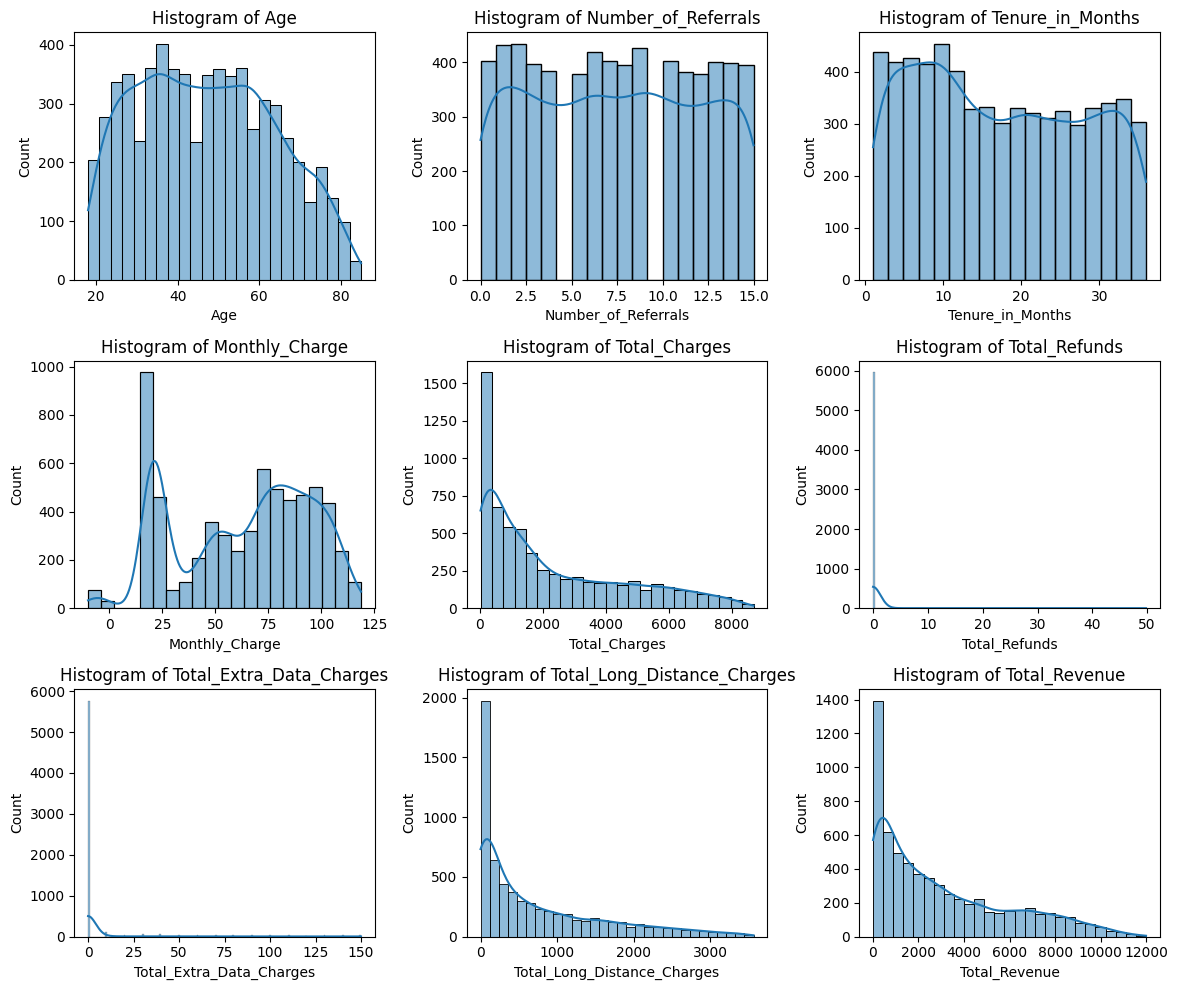

In [9]:
# Distribution of Numeric Data

plt.figure(figsize=(12,10))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(3,3,i+1)
    sns.histplot(numeric_columns[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


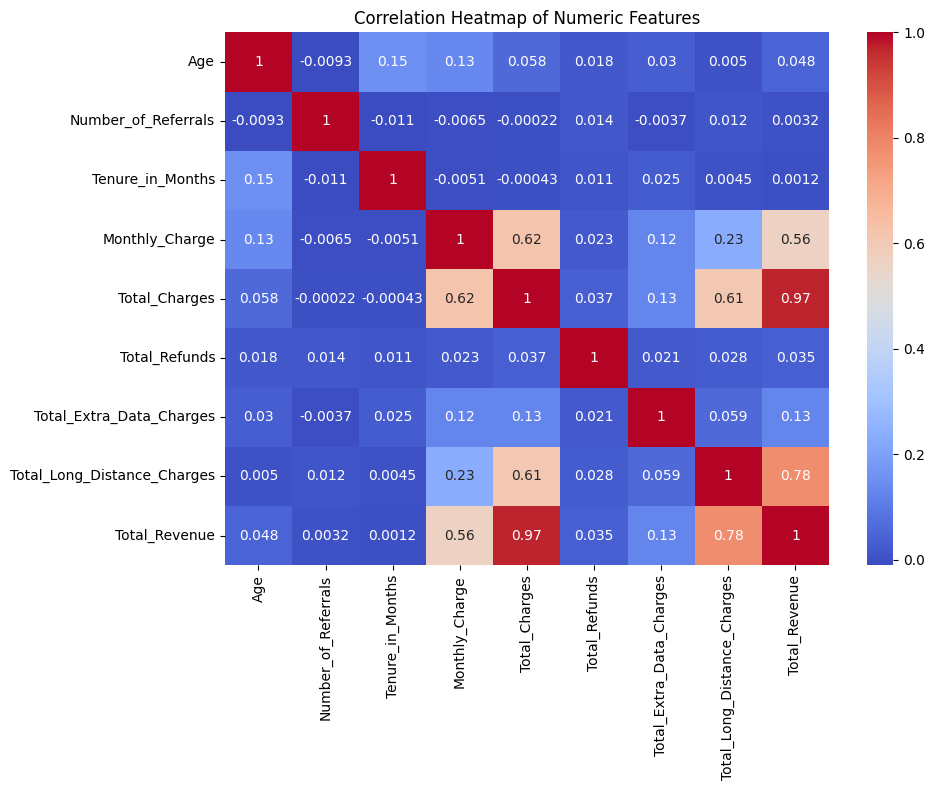

In [10]:

corr = numeric_columns.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

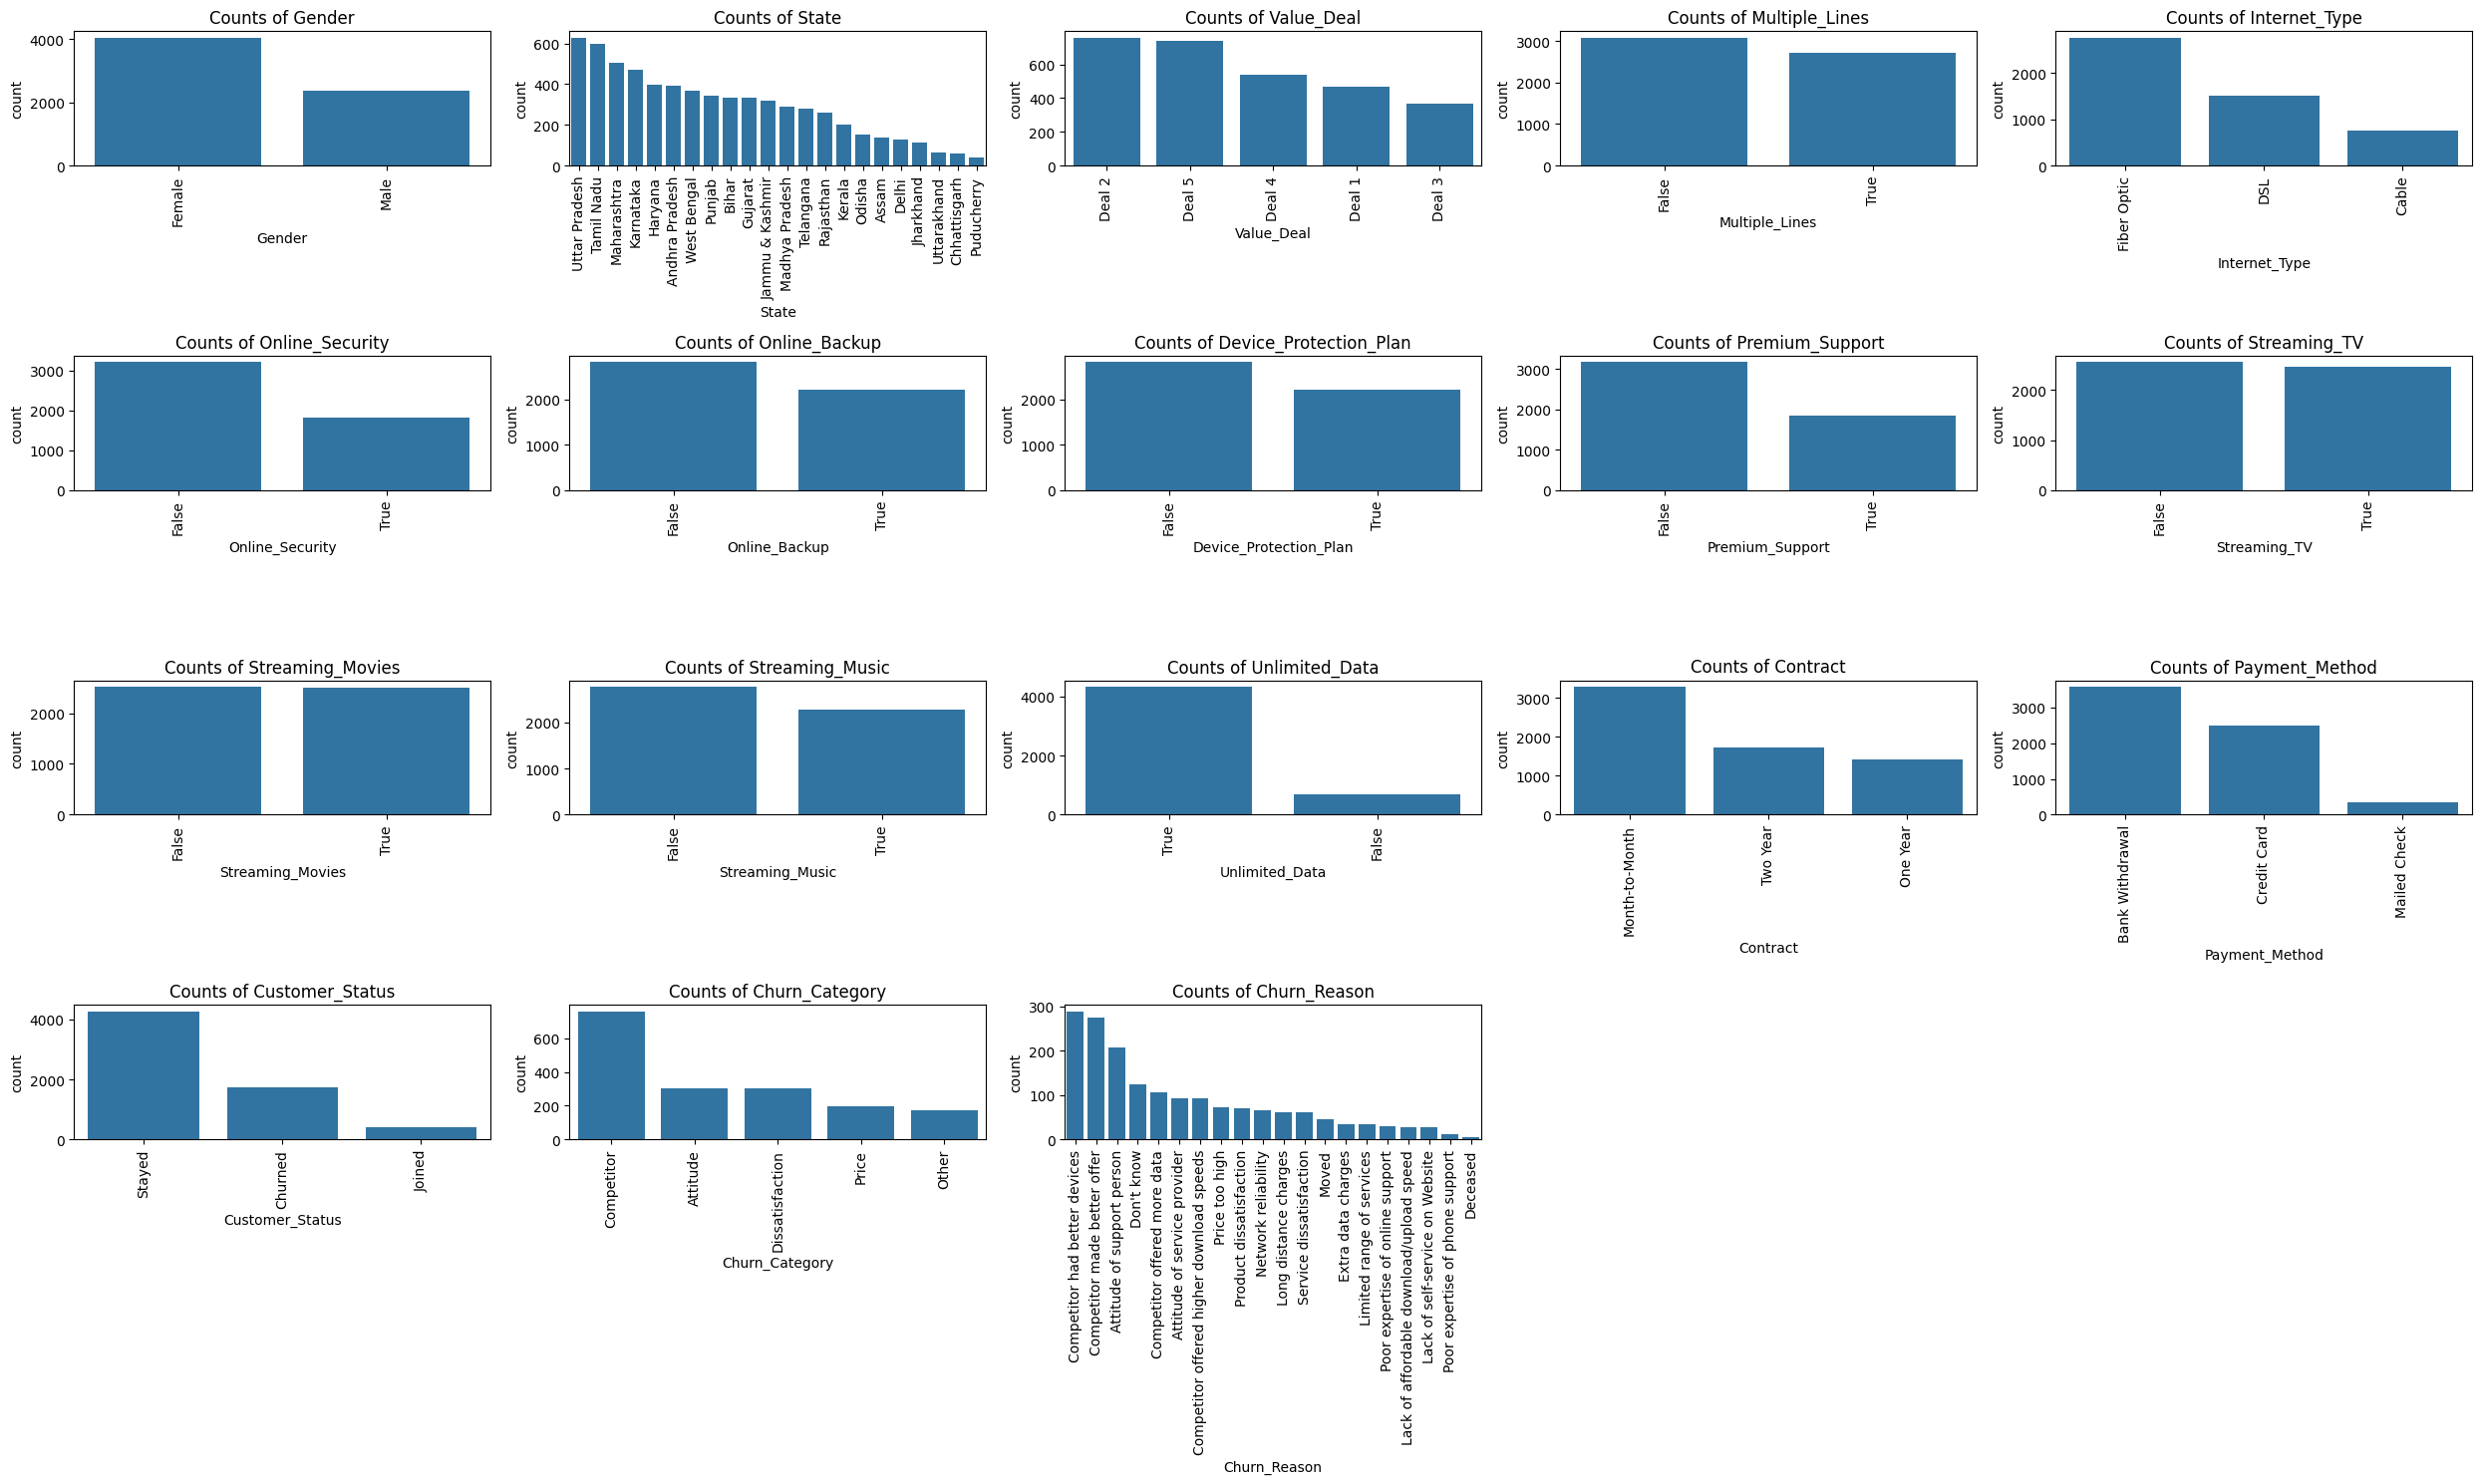

In [11]:
# Counts of Categorical data

plt.figure(figsize=(25,15))

for i, col in enumerate(category_columns_object):
    plt.subplot(4,5, i+1)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index) 
    plt.title(f'Counts of {col}')
    plt.xticks(rotation=90)  
    plt.tight_layout()

plt.show()


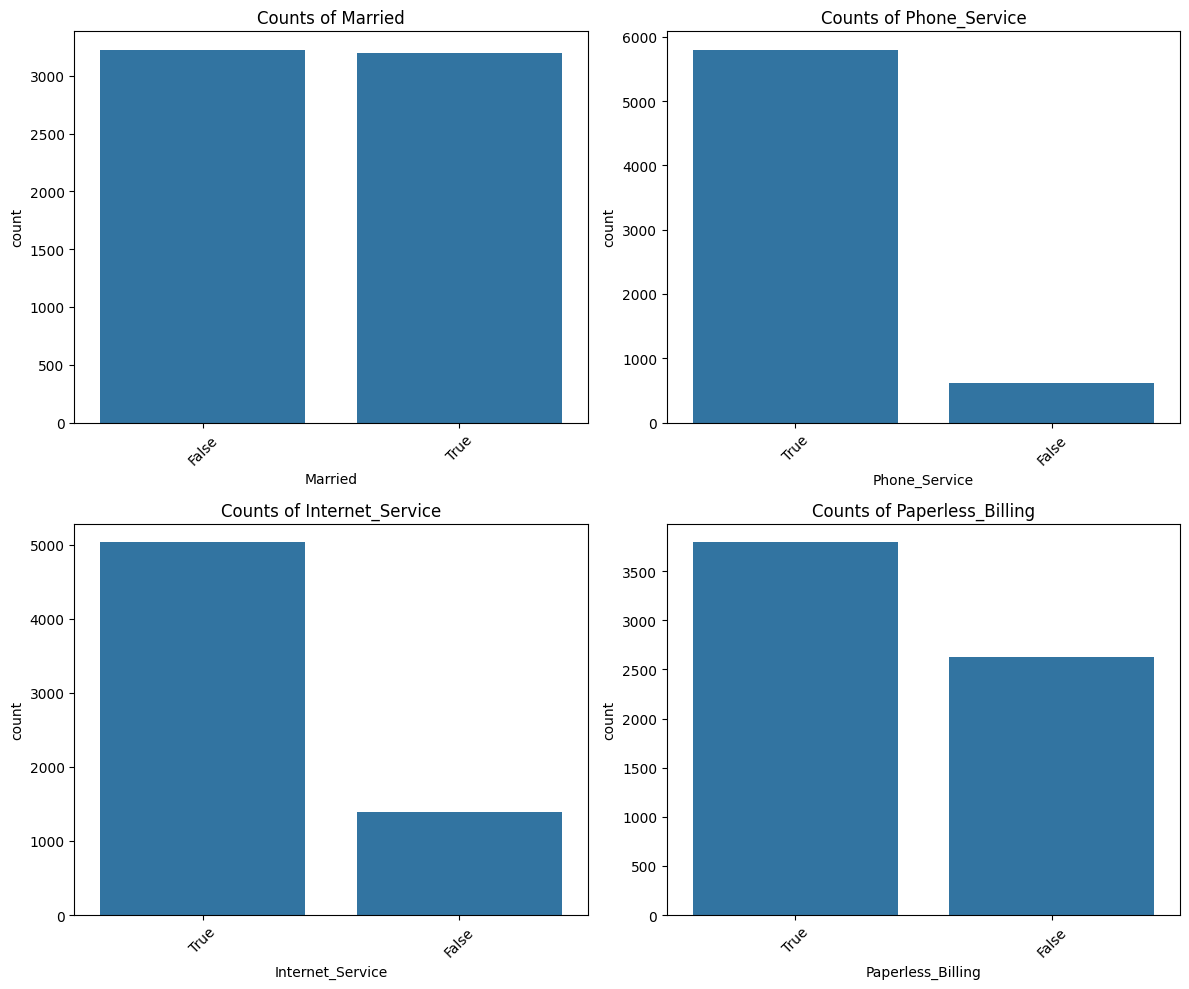

In [12]:
# Counts of Categorical data

plt.figure(figsize=(12,10))

for i, col in enumerate(category_columns_bool):
    plt.subplot(2,2, i+1)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index) 
    plt.title(f'Counts of {col}')
    plt.xticks(rotation=45)  
    plt.tight_layout()

plt.show()


In [13]:
# Important Feature and Target data

feature_x = df.drop(columns=['Customer_Status','State','Multiple_Lines','Paperless_Billing','Payment_Method','Married','Internet_Service'], axis=1)
target_y = df['Customer_Status']
print('Shape of x :', feature_x.shape)
print('Shape of y :', target_y.shape)

Shape of x : (6418, 24)
Shape of y : (6418,)


In [14]:
## train test split of data
x_train, x_test, y_train, y_test = train_test_split(feature_x, target_y, test_size=0.2, random_state=42)
print('Shape of X Train :', x_train.shape)
print('Shape of X Test :', x_test.shape)
print('Shape of Y Train :',y_train.shape)
print('Shape of Y Test :', y_test.shape)

Shape of X Train : (5134, 24)
Shape of X Test : (1284, 24)
Shape of Y Train : (5134,)
Shape of Y Test : (1284,)


In [15]:
# Seperate the Category and Numeric Columns For Handling Missing Value
numeric_columns = x_train.select_dtypes(include=['int64','float64']).columns.tolist()
category_columns = x_train.select_dtypes(include=['object','category']).columns.tolist()

## Data Preprocessing

In [16]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  
            ('scaler', StandardScaler())
        ]), numeric_columns),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  
            ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ]), category_columns)
    ])

## Modelling Pipeline


In [17]:
ensemble_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=50,max_depth=5, random_state=42)),
            ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
            ('xgb', XGBClassifier(learning_rate=0.01))
        ],
        voting='soft'
    ))
])

ensemble_pipeline.fit(x_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [18]:
y_pred = ensemble_pipeline.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9929906542056075


<Axes: >

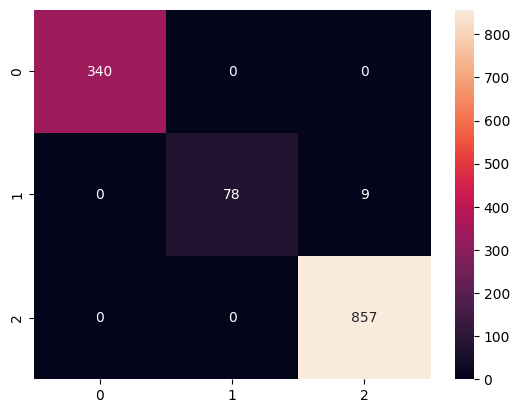

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Churned       1.00      1.00      1.00       340
      Joined       1.00      0.90      0.95        87
      Stayed       0.99      1.00      0.99       857

    accuracy                           0.99      1284
   macro avg       1.00      0.97      0.98      1284
weighted avg       0.99      0.99      0.99      1284



In [21]:
from collections import Counter
Counter(y_pred)

Counter({'Stayed': 866, 'Churned': 340, 'Joined': 78})

In [22]:
from joblib import dump, load

# Save model
dump(ensemble_pipeline, "churn_model.pkl")

['churn_model.pkl']

In [23]:
# Save Preprocessing
dump(preprocessor, "preprocessing.pkl")

['preprocessing.pkl']

In [24]:
# Load model
loaded_model = load("churn_model.pkl")

In [25]:
loaded_model

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [26]:
# Prediction on New data
new_data = x_test.iloc[3:4]
loaded_model = load('churn_model.pkl')
prediction = loaded_model.predict(new_data)
print("Churn Prediction:", prediction[0])


Churn Prediction: Churned
